<h2>Luật số lớn</h2>

<strong>Luật số lớn</strong> (Law of Large Numbers (LoLN)) phát biểu rằng giá trị trung bình (mean) có xu hướng tiệm cận về giá trị mà nó đang ước lượng. Nghĩa là kích thước mẫu dữ liệu càng lớn thì ước lượng quần thể càng chính xác. Như chúng ta tung một con xúc sắc nhiều lần liên tiếp, nó có xu hướng hội tụ về giá trị xác suất 0.5. LoLN tạo cơ sở cho kiểu suy luận dựa trên tần xuất. Lấy ví dụ minh hoạ với hàm coinPlot(). Hàm này nhận vào đối số n là số lượt tung xúc sắc. Sau mỗi lần tung, hàm này sẽ cộng dồn các giá trị 1 (head) và 0 (tail) sau đó tính trung bình cộng lại. Sau đó, hàm này sẽ xuất ra biểu đồ biến thiên của giá trị trung bình vừa mới tính được này.


In [1]:
library("ggplot2")
library("repr")
options(repr.plot.width=4, repr.plot.height=4)

coinPlot <- function(n){
    # calculate mean for each flip
    means <- cumsum(sample(0 : 1, n , replace = TRUE)) / (1  : n)
    
    # draw line chart
    g <- ggplot(data.frame(x = 1 : n, y = means), aes(x = x, y = y))
    
    # horizontal line determine P(x) = 0.5
    g <- g + geom_hline(size=1.5 ,yintercept = 0.5,alpha=0.6,
                      linetype="longdash") + geom_line(size = 1)
    
    # draw point if n flips < 100
    if(n<100){
    g <- g + geom_point(colour="red",size=3,alpha=0.8)
    }
    
    # axes label
    g <- g + labs(x = "Number of obs", y = "Cumulative mean")
    g <- g + scale_x_continuous(breaks=seq(0,n+1,ceiling(n/10)))
    
    # print all charts
    print(g)
    invisible()
}

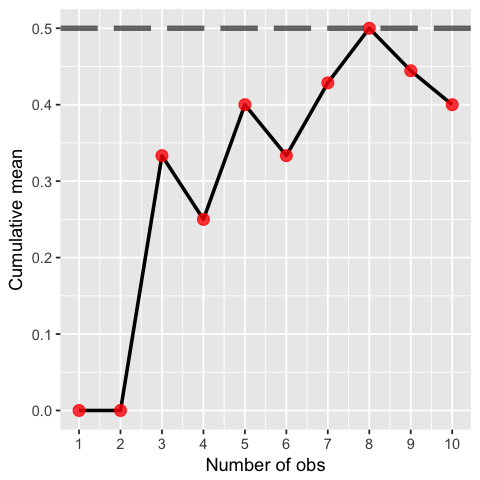

In [2]:
# Ví dụ tung xúc sắc 10 lần
coinPlot(10)

Biểu đồ xuất ra phụ thuộc vào giá trị ngẫu nhiên mà R tạo được. Vì vậy, biểu đồ trên có vẻ khác một chút khi chạy trên máy tính của bạn. Nếu bạn thử chạy hàm trên coinPlot(10) vài lần bạn sẽ thấy mỗi lần như vậy sẽ cho ra kết quả khác một chút. Bây giờ, ta thử tung xúc sắc 10,000 lần

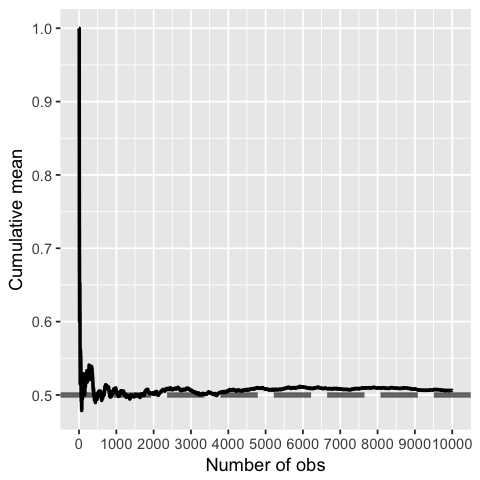

In [3]:
coinPlot(10000)

Bạn đã thấy được sự khác biệt phải không nào. Đây là minh chứng cho lý thuyết tiệm cận (asymptotics). Đường biến thiên hội tụ tại giá trị 0.5. Ta bảo rằng một ước lượng thống kê như vậy thì đồng nhất nếu nó hội tụ tại giá trị mà nó đang ước lượng. Luật số lớn bảo rằng trung bình mẫu của biến ngẫu nhiên iid thì đồng nhất với trung bình của quần thể. Tương tự như vậy, phương sai mẫu (sample variance) cũng có xu hướng hội tụ về phương sai của quần thể (population variance).

<h2>Định lý giới hạn trung tâm</h2>

<strong>Định lý giới hạn trung tâm</strong> (Central Limit Theorem (CLT)) là một trong những định lý quan trọng trong thống kê. Định lý phát biểu rằng phân phối của các giá trị trung bình của các biến ngẫu nhiên iid hội tụ về các giá trị chuẩn khi kích thước mẫu dữ liệu tăng lên.

Để minh hoạ CLT trực quan hơn ta quan sát hình sau.

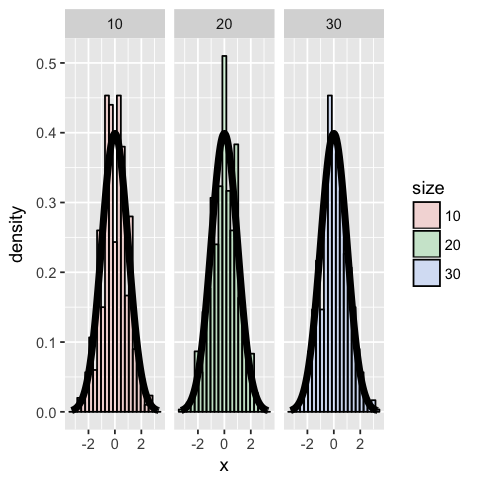

In [4]:
nosim <- 1000
cfunc <- function(x, n) sqrt(n) * (mean(x) - 3.5) / 1.71
dat <- data.frame(
  x = c(apply(matrix(sample(1 : 6, nosim * 10, replace = TRUE),
                     nosim), 1, cfunc, 10),
        apply(matrix(sample(1 : 6, nosim * 20, replace = TRUE),
                     nosim), 1, cfunc, 20),
        apply(matrix(sample(1 : 6, nosim * 30, replace = TRUE),
                     nosim), 1, cfunc, 30)
  ),
  size = factor(rep(c(10, 20, 30), rep(nosim, 3))))
g <- ggplot(dat, aes(x = x, fill = size)) + geom_histogram(alpha = .20, binwidth=.3, colour = "black", aes(y = ..density..))
g <- g + stat_function(fun = dnorm, size = 2)
g <- g + facet_grid(. ~ size)
print(g)

Hình trên biểu diễn 3 histogram của 1000 giá trị trung bình khi thực hiện 1000 lần lấy mẫu trên kích thước mẫu n (10, 20, 30). Mỗi giá trị trung bình của n mẫu (n=10,20,30) được chuẩn hoá bằng cách trừ cho mean (3.5) sau đó chia cho độ lỗi chuẩn (standard error), sqrt(2.92/n). Việc chuẩn hoá này khiến cho các histogram có dạng như phân phối chuẩn (với mean bằng 0 và độ lệch chuẩn bằng 1).

Chú ý rằng CLT không nói gì về phân bố ban đầu của quần thể là phân phối chuẩn. Ta có thể giả định tính phân phối chuẩn của trung bình quần thể bất chấp phân bố của quần thể ta đang có. Chỉ cần kích thước mẫu dữ liệu đủ lớn và các mẫu dữ liệu độc lập với nhau.

<h2>Khoảng tin cậy</h2>

Bây giờ chúng ta sẽ nói về khoảng tin cậy (confidence intervals). Từ CLT với n đủ lớn, trung bình mẫu là mean $\mu$ và độ lệch chuẩn $\frac{\sigma}{\sqrt n}$. Ta biết rằng 95% diện tích phía dưới đường cong nằm trong khoảng độ lệch chuẩn này.


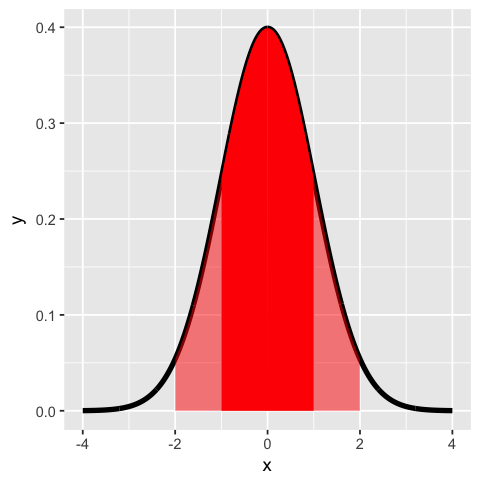

In [5]:
x <- seq(-4, 4, length = 1000)
dat <- data.frame(x=x, y=dnorm(x))
g <- ggplot(dat, aes(x = x, y = y)) + geom_line(size = 1.5)
g <- g + geom_ribbon(aes(x = ifelse(x > -1 & x < 1, x, 0), ymin = 0, ymax = dat$y), fill = "red", alpha = 1)
g <- g +  geom_ribbon(aes(x = ifelse(x > -2 & x < 2, x, 0), ymin = 0, ymax = dat$y), fill = "red", alpha = 0.5)
print(g)

Biểu đồ trên là phân phối chuẩn với mu=0 và sigma=1, để minh họa điều trên, toàn bộ bóng đỏ mô tả diện tích nằm trong độ lệch chuẩn 2, bóng đậm hơn mô tả 68% diện tích nằm trong độ lệch chuẩn 1. Theo đó, 5% diện tích còn lại không được tô bóng đỏ. Nghĩa là xác suất trung bình mẫu $\mu+2\sigma/\sqrt n < X' < \mu-2\sigma/\sqrt n$ là 5%.

Tương tự, xác suất nằm trong giới hạn này là 95%. Tất nhiên ta có thể có nhiều khoảng tin cậy khác nhau. Nếu ta muốn giá trị khác 95%, ta có thể sử dụng phân vị (quantile) thay cho 2. Nếu ta muốn tìm khoảng tin cậy 90% thì phân vị chúng ta được tính như sau (100-90)/2 + 90 = 95. Ta dùng hàm qnorm của R để tìm phân vị 95 cho phân phối chuẩn. Hàm này lấy đối số là xác suất. Các đối số còn lại ta có thể lấy mặc định.


In [6]:
qnorm(.95)

[1] 1.644854

<h2>Tổng kết</h2>

<strong>Luật số lớn</strong> cho chúng ta biết rằng các giá trị trung bình của mẫu dữ liệu iid hội tụ về các giá trị trung bình của quần thể. <strong>Định lý giới hạn trung tâm</strong> cho chúng ta biết rằng các giá trị trung bình xấp xĩ phân phối chuẩn khi kích thước lấy mẫu càng lớn. Và phân phối này có trọng tâm đặt tại trung bình của quần thể, độ lệch chuẩn xấp xỉ với độ lỗi chuẩn. Để tính <strong>khoảng tin cậy</strong> (confidence interval) <strong>cho mean</strong> ta lấy trung bình mẫu +/- cho tích của phân vị chuẩn (normal quantile) và độ lỗi chuẩn (standard error). Khi dữ liệu của bạn có phương sai nhỏ thì khoảng tin cậy của chúng ta cũng nhỏ.

<strong>Nguồn tham khảo:</strong>
<ul>
	<li><a href="http://swirlstats.com/" target="_blank" rel="noopener noreferrer">http://swirlstats.com/</a></li>
	<li><a href="http://mfviz.com/central-limit/">Central Limit Theorem</a></li>
</ul>